<a href="https://colab.research.google.com/github/aannddrree/turmauniaraIA2/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%pip install tensorflow keras

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam


In [21]:
# Carregar o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar os dados (deixar os valores entre 0 e 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Remodelar os dados para ficarem no formato [amostras, pixels]
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


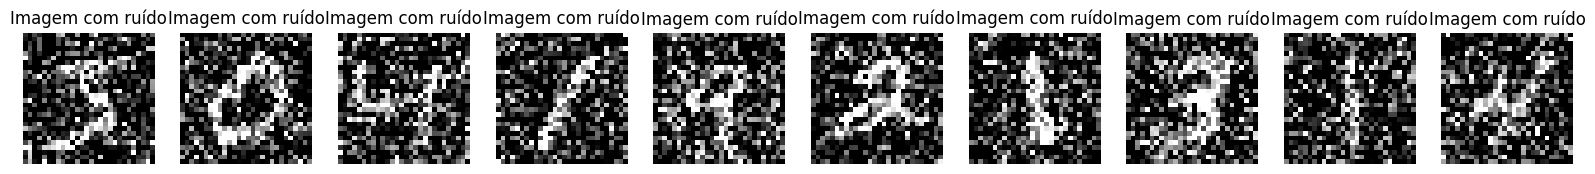

In [22]:
# Adicionar ruído às imagens
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Limitar os valores entre 0 e 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualizar algumas imagens com ruído
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Imagem com ruído")
    plt.axis('off')
plt.show()


In [23]:
# Dimensão de entrada
input_img = Input(shape=(28, 28, 1))

# Codificador (Encoder)
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# Decodificador (Decoder)
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# Modelo de Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar o modelo
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Resumo do modelo
autoencoder.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_11 (Reshape)                 │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Treinamento do autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3257 - val_loss: 0.1801
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1708 - val_loss: 0.1494
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1474 - val_loss: 0.1389
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1385 - val_loss: 0.1331
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1334 - val_loss: 0.1294
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1297 - val_loss: 0.1268
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1269 - val_loss: 0.1250
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1248 - val_loss: 0.1228
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1226 - val_loss: 0.1212
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1209 - val_loss: 0.1201
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1194 - val_loss: 0.1189
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


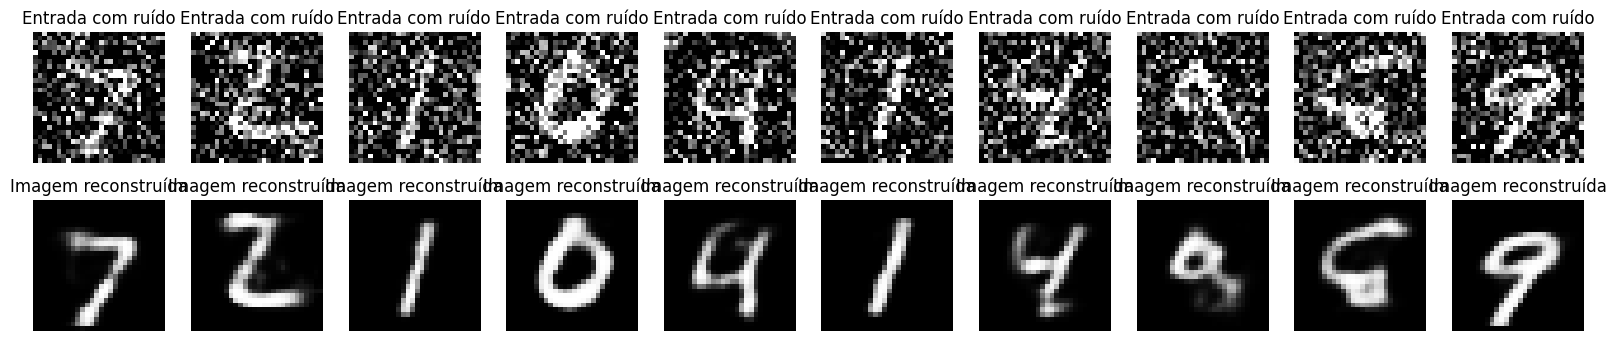

In [25]:
# Fazer previsões nas imagens de teste ruidosas
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualizar os resultados
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Exibir as imagens ruidosas
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Entrada com ruído")
    plt.axis('off')

    # Exibir as imagens reconstruídas (sem ruído)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Imagem reconstruída")
    plt.axis('off')
plt.show()
